In [1]:
# pip install pandas

In [2]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'clean_data.csv'

# Read the first 100 rows
df1 = pd.read_csv(file_path, nrows=1000)

# Display the data
df1

job_title  \
0    Computer Science Data Mining Engineering Machi...   
1    Agile AWS Azure Computer Science CX Engineerin...   
2    Consulting Director, Machine Learning/Computer...   
3                            Full Stack Developer (AI)   
4    Senior Principal Analyst, Artificial Intellige...   
..                                                 ...   
995          Lead Software Engineer - Machine Learning   
996                          Manager, Data Engineering   
997                             Customer Data Engineer   
998                     APM - PMIS - Data Engineer H/F   
999                                       Data Analyst   

                                              job_desc  
0               Career development Startup environment  
1               Career development Startup environment  
2    AWS Azure Classification Computer Science Comp...  
3    Angular Computer Science JavaScript Keras Mong...  
4      Consulting Excel Market research Research Spark  
..                                                 ...  
995  APIs Architecture Big Data Chatbots Computer S...  
996  Architecture AWS Azure Computer Science Data g...  
997  AWS Azure Consulting Data Analytics Databricks...  
998  Airflow BigQuery Hadoop Oracle Power BI Python +3  
999                       Engineering Genetics Testing  

[1000 rows x 2 columns]

In [3]:
df1['job_desc'][930]
# the first dataframe isn't usefull then I will ignore it for now.

'ANN Computer Science Computer Vision Engineering Genetics Git +4'

In [4]:
file_path = 'train.csv'
df = pd.read_csv(file_path)
df #display the dataframe 

job_no                                    job_description  \
0      Id-12765   Zest Scientific is searching for an accomplis...   
1      Id-22925  En el mundo de los CRO's típicos, esta compañí...   
2       Id-1321  Asha Mistry of Umbilical Life is recruiting an...   
3       Id-9473   Sales Representative - Laser in der Medizinte...   
4      Id-14952  Field Service Engineer - Life Science\r\r\r\nC...   
...         ...                                                ...   
17652   Id-1708  Evolve Selection are currently recruiting for ...   
17653  Id-18516  Therapy Area: Respiratory\r\r\r\nPackage: Nego...   
17654  Id-13531  COMPANY\r\r\r\nA specialised health economics ...   
17655  Id-21805  Asha Mistry de Umbilical Life está reclutando ...   
17656  Id-13021  Mid Size CRO - UK Homebased CRA\r\r\r\nI am cu...   

               job_type                                      category  
0             Permanent  Pharmaceutical, Healthcare and Medical Sales  
1             Permanent                             Clinical Research  
2      Contract/Interim                      Pharmaceutical Marketing  
3             Permanent  Pharmaceutical, Healthcare and Medical Sales  
4             Permanent                    Manufacturing & Operations  
...                 ...                                           ...  
17652         Permanent                    Manufacturing & Operations  
17653         Permanent                                       Science  
17654         Permanent     Medical Information and Pharmacovigilance  
17655         Permanent                             Clinical Research  
17656         Permanent                             Clinical Research  

[17657 rows x 4 columns]

In [5]:
# Data need to be cleaned so let's start doing that
df['job_description'][17000]

'Evolve Selection are currently recruiting for an exciting new opportunity as a Medical Representative with a dynamic and supportive Pharmaceutical organisation. The main purpose of this role is to sell and promote our client’s products to targeted Primary Care Physicians, Pharmacists, Nurses, and other members of the Primary Care sector.\r\r\r\nIdeal Candidate Background:\r\r\r\nAnti-Coagulation / Cardiovascular experience preferred but not essential.\r\r\r\nSound knowledge of commercial environment.\r\r\r\nTherapy area knowledge and brand strategies.\r\r\r\nInternal processes and network.\r\r\r\nStrong Primary Care sales experience and success.\r\r\r\nABPI would be ideal, however, Representatives with 1 years’ experience or less will be considered.\r\r\r\nDegree level or equivalent. Science or business background but others considered.\r\r\r\nGood understanding of the NHS (UK) organisation and framework/national policies.\r\r\r\nRole responsibilities:\r\r\r\nWork within the Key Accou

## Data cleaning - jobs dataset

In [6]:
# pip install langdetect

In [7]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [8]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 2.5 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/12.8 MB 2.5 MB/s eta 0:00:05
     ------ --------------------------------- 2.1/12.8 MB 2.6 MB/s eta 0:00:05
     --------- ------------------------------ 3.1/12.8 MB 3.1 MB/s eta 0:00:04
     ------------ --------------------------- 3.9/12.8 MB 3.2 MB/s eta 0:00:03
     ------------- -------------------------- 4.5/12.8 MB 3.4 MB/s eta 0:00:03
     ---------------- ----------------------- 5.2/12.8 MB 3.3 MB/s eta 0:00:03
     ------------------ --------------------- 6.0/12.8 MB 3.2 MB/s eta 0:00:03
     ---------------------- ----------------- 7.3/12.8 MB 3.5 MB/s eta 0:00:02
     ------------------------ --------------- 7.9/12.8 MB 3.4 MB/s eta 0:

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download tokenizer data
from langdetect import detect
import spacy

# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ebouk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ebouk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ebouk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
import warnings
warnings.filterwarnings("ignore")

### a) Convert to Lowercase

In [11]:
def to_lowercase(text):
    return text.lower()

df['cleaned_description'] = df['job_description'].apply(to_lowercase)
df

job_no                                    job_description  \
0      Id-12765   Zest Scientific is searching for an accomplis...   
1      Id-22925  En el mundo de los CRO's típicos, esta compañí...   
2       Id-1321  Asha Mistry of Umbilical Life is recruiting an...   
3       Id-9473   Sales Representative - Laser in der Medizinte...   
4      Id-14952  Field Service Engineer - Life Science\r\r\r\nC...   
...         ...                                                ...   
17652   Id-1708  Evolve Selection are currently recruiting for ...   
17653  Id-18516  Therapy Area: Respiratory\r\r\r\nPackage: Nego...   
17654  Id-13531  COMPANY\r\r\r\nA specialised health economics ...   
17655  Id-21805  Asha Mistry de Umbilical Life está reclutando ...   
17656  Id-13021  Mid Size CRO - UK Homebased CRA\r\r\r\nI am cu...   

               job_type                                      category  \
0             Permanent  Pharmaceutical, Healthcare and Medical Sales   
1             Permanent                             Clinical Research   
2      Contract/Interim                      Pharmaceutical Marketing   
3             Permanent  Pharmaceutical, Healthcare and Medical Sales   
4             Permanent                    Manufacturing & Operations   
...                 ...                                           ...   
17652         Permanent                    Manufacturing & Operations   
17653         Permanent                                       Science   
17654         Permanent     Medical Information and Pharmacovigilance   
17655         Permanent                             Clinical Research   
17656         Permanent                             Clinical Research   

                                     cleaned_description  
0       zest scientific is searching for an accomplis...  
1      en el mundo de los cro's típicos, esta compañí...  
2      asha mistry of umbilical life is recruiting an...  
3       sales representative - laser in der medizinte...  
4      field service engineer - life science\r\r\r\nc...  
...                                                  ...  
17652  evolve selection are currently recruiting for ...  
17653  therapy area: respiratory\r\r\r\npackage: nego...  
17654  company\r\r\r\na specialised health economics ...  
17655  asha mistry de umbilical life está reclutando ...  
17656  mid size cro - uk homebased cra\r\r\r\ni am cu...  

[17657 rows x 5 columns]

### b) Removal of Non-English Text 

In [12]:
def keep_only_english(text):
    try:
        if detect(text) == 'en':
            return text
        else:
            return ''
    except:
        return ''  # Return empty for undetectable text

df['cleaned_description'] = df['cleaned_description'].apply(keep_only_english)
df = df[df['cleaned_description'] != '']  # Drop rows with empty descriptions
df

job_no                                    job_description  \
0      Id-12765   Zest Scientific is searching for an accomplis...   
2       Id-1321  Asha Mistry of Umbilical Life is recruiting an...   
3       Id-9473   Sales Representative - Laser in der Medizinte...   
4      Id-14952  Field Service Engineer - Life Science\r\r\r\nC...   
7      Id-16692   Due to increased business demand this award w...   
...         ...                                                ...   
17650  Id-13135  Senior Medical Writing – Global Consultancy\r\...   
17652   Id-1708  Evolve Selection are currently recruiting for ...   
17653  Id-18516  Therapy Area: Respiratory\r\r\r\nPackage: Nego...   
17654  Id-13531  COMPANY\r\r\r\nA specialised health economics ...   
17656  Id-13021  Mid Size CRO - UK Homebased CRA\r\r\r\nI am cu...   

               job_type                                      category  \
0             Permanent  Pharmaceutical, Healthcare and Medical Sales   
2      Contract/Interim                      Pharmaceutical Marketing   
3             Permanent  Pharmaceutical, Healthcare and Medical Sales   
4             Permanent                    Manufacturing & Operations   
7             Permanent  Pharmaceutical, Healthcare and Medical Sales   
...                 ...                                           ...   
17650         Permanent                             Clinical Research   
17652         Permanent                    Manufacturing & Operations   
17653         Permanent                                       Science   
17654         Permanent     Medical Information and Pharmacovigilance   
17656         Permanent                             Clinical Research   

                                     cleaned_description  
0       zest scientific is searching for an accomplis...  
2      asha mistry of umbilical life is recruiting an...  
3       sales representative - laser in der medizinte...  
4      field service engineer - life science\r\r\r\nc...  
7       due to increased business demand this award w...  
...                                                  ...  
17650  senior medical writing – global consultancy\r\...  
17652  evolve selection are currently recruiting for ...  
17653  therapy area: respiratory\r\r\r\npackage: nego...  
17654  company\r\r\r\na specialised health economics ...  
17656  mid size cro - uk homebased cra\r\r\r\ni am cu...  

[12355 rows x 5 columns]

### c) Removal of URLs, Email Addresses, and HTML Tags

In [13]:
def remove_urls_emails_html(text):
    text = re.sub(r'http[s]?://\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)         # Remove email addresses
    text = re.sub(r'<.*?>', '', text)           # Remove HTML tags
    return text

df['cleaned_description'] = df['cleaned_description'].apply(remove_urls_emails_html)
df

job_no                                    job_description  \
0      Id-12765   Zest Scientific is searching for an accomplis...   
2       Id-1321  Asha Mistry of Umbilical Life is recruiting an...   
3       Id-9473   Sales Representative - Laser in der Medizinte...   
4      Id-14952  Field Service Engineer - Life Science\r\r\r\nC...   
7      Id-16692   Due to increased business demand this award w...   
...         ...                                                ...   
17650  Id-13135  Senior Medical Writing – Global Consultancy\r\...   
17652   Id-1708  Evolve Selection are currently recruiting for ...   
17653  Id-18516  Therapy Area: Respiratory\r\r\r\nPackage: Nego...   
17654  Id-13531  COMPANY\r\r\r\nA specialised health economics ...   
17656  Id-13021  Mid Size CRO - UK Homebased CRA\r\r\r\nI am cu...   

               job_type                                      category  \
0             Permanent  Pharmaceutical, Healthcare and Medical Sales   
2      Contract/Interim                      Pharmaceutical Marketing   
3             Permanent  Pharmaceutical, Healthcare and Medical Sales   
4             Permanent                    Manufacturing & Operations   
7             Permanent  Pharmaceutical, Healthcare and Medical Sales   
...                 ...                                           ...   
17650         Permanent                             Clinical Research   
17652         Permanent                    Manufacturing & Operations   
17653         Permanent                                       Science   
17654         Permanent     Medical Information and Pharmacovigilance   
17656         Permanent                             Clinical Research   

                                     cleaned_description  
0       zest scientific is searching for an accomplis...  
2      asha mistry of umbilical life is recruiting an...  
3       sales representative - laser in der medizinte...  
4      field service engineer - life science\r\r\r\nc...  
7       due to increased business demand this award w...  
...                                                  ...  
17650  senior medical writing – global consultancy\r\...  
17652  evolve selection are currently recruiting for ...  
17653  therapy area: respiratory\r\r\r\npackage: nego...  
17654  company\r\r\r\na specialised health economics ...  
17656  mid size cro - uk homebased cra\r\r\r\ni am cu...  

[12355 rows x 5 columns]

### d) Removal of Special Characters, Punctuation, and Numbers

In [14]:
def remove_special_characters(text):
    return re.sub(r'[^\w\s]', '', text)

df['cleaned_description'] = df['cleaned_description'].apply(remove_special_characters)
df

job_no                                    job_description  \
0      Id-12765   Zest Scientific is searching for an accomplis...   
2       Id-1321  Asha Mistry of Umbilical Life is recruiting an...   
3       Id-9473   Sales Representative - Laser in der Medizinte...   
4      Id-14952  Field Service Engineer - Life Science\r\r\r\nC...   
7      Id-16692   Due to increased business demand this award w...   
...         ...                                                ...   
17650  Id-13135  Senior Medical Writing – Global Consultancy\r\...   
17652   Id-1708  Evolve Selection are currently recruiting for ...   
17653  Id-18516  Therapy Area: Respiratory\r\r\r\nPackage: Nego...   
17654  Id-13531  COMPANY\r\r\r\nA specialised health economics ...   
17656  Id-13021  Mid Size CRO - UK Homebased CRA\r\r\r\nI am cu...   

               job_type                                      category  \
0             Permanent  Pharmaceutical, Healthcare and Medical Sales   
2      Contract/Interim                      Pharmaceutical Marketing   
3             Permanent  Pharmaceutical, Healthcare and Medical Sales   
4             Permanent                    Manufacturing & Operations   
7             Permanent  Pharmaceutical, Healthcare and Medical Sales   
...                 ...                                           ...   
17650         Permanent                             Clinical Research   
17652         Permanent                    Manufacturing & Operations   
17653         Permanent                                       Science   
17654         Permanent     Medical Information and Pharmacovigilance   
17656         Permanent                             Clinical Research   

                                     cleaned_description  
0       zest scientific is searching for an accomplis...  
2      asha mistry of umbilical life is recruiting an...  
3       sales representative  laser in der medizintec...  
4      field service engineer  life science\r\r\r\nca...  
7       due to increased business demand this award w...  
...                                                  ...  
17650  senior medical writing  global consultancy\r\r...  
17652  evolve selection are currently recruiting for ...  
17653  therapy area respiratory\r\r\r\npackage negoti...  
17654  company\r\r\r\na specialised health economics ...  
17656  mid size cro  uk homebased cra\r\r\r\ni am cur...  

[12355 rows x 5 columns]

### e) Removal of Line Breaks and Extra Whitespace

In [15]:
def remove_linebreaks_whitespace(text):
    text = re.sub(r'\r|\n', ' ', text)  # Replace line breaks with space
    text = re.sub(r'\s+', ' ', text)    # Remove extra spaces
    return text.strip()

df['cleaned_description'] = df['cleaned_description'].apply(remove_linebreaks_whitespace)
df

job_no                                    job_description  \
0      Id-12765   Zest Scientific is searching for an accomplis...   
2       Id-1321  Asha Mistry of Umbilical Life is recruiting an...   
3       Id-9473   Sales Representative - Laser in der Medizinte...   
4      Id-14952  Field Service Engineer - Life Science\r\r\r\nC...   
7      Id-16692   Due to increased business demand this award w...   
...         ...                                                ...   
17650  Id-13135  Senior Medical Writing – Global Consultancy\r\...   
17652   Id-1708  Evolve Selection are currently recruiting for ...   
17653  Id-18516  Therapy Area: Respiratory\r\r\r\nPackage: Nego...   
17654  Id-13531  COMPANY\r\r\r\nA specialised health economics ...   
17656  Id-13021  Mid Size CRO - UK Homebased CRA\r\r\r\nI am cu...   

               job_type                                      category  \
0             Permanent  Pharmaceutical, Healthcare and Medical Sales   
2      Contract/Interim                      Pharmaceutical Marketing   
3             Permanent  Pharmaceutical, Healthcare and Medical Sales   
4             Permanent                    Manufacturing & Operations   
7             Permanent  Pharmaceutical, Healthcare and Medical Sales   
...                 ...                                           ...   
17650         Permanent                             Clinical Research   
17652         Permanent                    Manufacturing & Operations   
17653         Permanent                                       Science   
17654         Permanent     Medical Information and Pharmacovigilance   
17656         Permanent                             Clinical Research   

                                     cleaned_description  
0      zest scientific is searching for an accomplish...  
2      asha mistry of umbilical life is recruiting an...  
3      sales representative laser in der medizintechn...  
4      field service engineer life science cambridge ...  
7      due to increased business demand this award wi...  
...                                                  ...  
17650  senior medical writing global consultancy with...  
17652  evolve selection are currently recruiting for ...  
17653  therapy area respiratory package negotiable ba...  
17654  company a specialised health economics consult...  
17656  mid size cro uk homebased cra i am currently p...  

[12355 rows x 5 columns]

### f) Removal of Stop words

In [16]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

df['cleaned_description'] = df['cleaned_description'].apply(remove_stopwords)
df

job_no                                    job_description  \
0      Id-12765   Zest Scientific is searching for an accomplis...   
2       Id-1321  Asha Mistry of Umbilical Life is recruiting an...   
3       Id-9473   Sales Representative - Laser in der Medizinte...   
4      Id-14952  Field Service Engineer - Life Science\r\r\r\nC...   
7      Id-16692   Due to increased business demand this award w...   
...         ...                                                ...   
17650  Id-13135  Senior Medical Writing – Global Consultancy\r\...   
17652   Id-1708  Evolve Selection are currently recruiting for ...   
17653  Id-18516  Therapy Area: Respiratory\r\r\r\nPackage: Nego...   
17654  Id-13531  COMPANY\r\r\r\nA specialised health economics ...   
17656  Id-13021  Mid Size CRO - UK Homebased CRA\r\r\r\nI am cu...   

               job_type                                      category  \
0             Permanent  Pharmaceutical, Healthcare and Medical Sales   
2      Contract/Interim                      Pharmaceutical Marketing   
3             Permanent  Pharmaceutical, Healthcare and Medical Sales   
4             Permanent                    Manufacturing & Operations   
7             Permanent  Pharmaceutical, Healthcare and Medical Sales   
...                 ...                                           ...   
17650         Permanent                             Clinical Research   
17652         Permanent                    Manufacturing & Operations   
17653         Permanent                                       Science   
17654         Permanent     Medical Information and Pharmacovigilance   
17656         Permanent                             Clinical Research   

                                     cleaned_description  
0      zest scientific searching accomplished scienti...  
2      asha mistry umbilical life recruiting experien...  
3      sales representative laser der medizintechnik ...  
4      field service engineer life science cambridge ...  
7      due increased business demand award winning wo...  
...                                                  ...  
17650  senior medical writing global consultancy new ...  
17652  evolve selection currently recruiting exciting...  
17653  therapy area respiratory package negotiable ba...  
17654  company specialised health economics consultan...  
17656  mid size cro uk homebased cra currently partne...  

[12355 rows x 5 columns]

### g) Words lemmatization

In [17]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

df['cleaned_description'] = df['cleaned_description'].apply(lemmatize_text)
df

job_no                                    job_description  \
0      Id-12765   Zest Scientific is searching for an accomplis...   
2       Id-1321  Asha Mistry of Umbilical Life is recruiting an...   
3       Id-9473   Sales Representative - Laser in der Medizinte...   
4      Id-14952  Field Service Engineer - Life Science\r\r\r\nC...   
7      Id-16692   Due to increased business demand this award w...   
...         ...                                                ...   
17650  Id-13135  Senior Medical Writing – Global Consultancy\r\...   
17652   Id-1708  Evolve Selection are currently recruiting for ...   
17653  Id-18516  Therapy Area: Respiratory\r\r\r\nPackage: Nego...   
17654  Id-13531  COMPANY\r\r\r\nA specialised health economics ...   
17656  Id-13021  Mid Size CRO - UK Homebased CRA\r\r\r\nI am cu...   

               job_type                                      category  \
0             Permanent  Pharmaceutical, Healthcare and Medical Sales   
2      Contract/Interim                      Pharmaceutical Marketing   
3             Permanent  Pharmaceutical, Healthcare and Medical Sales   
4             Permanent                    Manufacturing & Operations   
7             Permanent  Pharmaceutical, Healthcare and Medical Sales   
...                 ...                                           ...   
17650         Permanent                             Clinical Research   
17652         Permanent                    Manufacturing & Operations   
17653         Permanent                                       Science   
17654         Permanent     Medical Information and Pharmacovigilance   
17656         Permanent                             Clinical Research   

                                     cleaned_description  
0      zest scientific searching accomplished scienti...  
2      asha mistry umbilical life recruiting experien...  
3      sale representative laser der medizintechnik m...  
4      field service engineer life science cambridge ...  
7      due increased business demand award winning wo...  
...                                                  ...  
17650  senior medical writing global consultancy new ...  
17652  evolve selection currently recruiting exciting...  
17653  therapy area respiratory package negotiable ba...  
17654  company specialised health economics consultan...  
17656  mid size cro uk homebased cra currently partne...  

[12355 rows x 5 columns]

### h) Tokenization

In [18]:
# !python -m spacy download en_core_web_sm

In [19]:
nlp = spacy.load("en_core_web_sm")
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

df['tokenized_description'] = df['cleaned_description'].apply(tokenize_text)

In [20]:
df

job_no                                    job_description  \
0      Id-12765   Zest Scientific is searching for an accomplis...   
2       Id-1321  Asha Mistry of Umbilical Life is recruiting an...   
3       Id-9473   Sales Representative - Laser in der Medizinte...   
4      Id-14952  Field Service Engineer - Life Science\r\r\r\nC...   
7      Id-16692   Due to increased business demand this award w...   
...         ...                                                ...   
17650  Id-13135  Senior Medical Writing – Global Consultancy\r\...   
17652   Id-1708  Evolve Selection are currently recruiting for ...   
17653  Id-18516  Therapy Area: Respiratory\r\r\r\nPackage: Nego...   
17654  Id-13531  COMPANY\r\r\r\nA specialised health economics ...   
17656  Id-13021  Mid Size CRO - UK Homebased CRA\r\r\r\nI am cu...   

               job_type                                      category  \
0             Permanent  Pharmaceutical, Healthcare and Medical Sales   
2      Contract/Interim                      Pharmaceutical Marketing   
3             Permanent  Pharmaceutical, Healthcare and Medical Sales   
4             Permanent                    Manufacturing & Operations   
7             Permanent  Pharmaceutical, Healthcare and Medical Sales   
...                 ...                                           ...   
17650         Permanent                             Clinical Research   
17652         Permanent                    Manufacturing & Operations   
17653         Permanent                                       Science   
17654         Permanent     Medical Information and Pharmacovigilance   
17656         Permanent                             Clinical Research   

                                     cleaned_description  \
0      zest scientific searching accomplished scienti...   
2      asha mistry umbilical life recruiting experien...   
3      sale representative laser der medizintechnik m...   
4      field service engineer life science cambridge ...   
7      due increased business demand award winning wo...   
...                                                  ...   
17650  senior medical writing global consultancy new ...   
17652  evolve selection currently recruiting exciting...   
17653  therapy area respiratory package negotiable ba...   
17654  company specialised health economics consultan...   
17656  mid size cro uk homebased cra currently partne...   

                                   tokenized_description  
0      [zest, scientific, searching, accomplished, sc...  
2      [asha, mistry, umbilical, life, recruiting, ex...  
3      [sale, representative, laser, der, medizintech...  
4      [field, service, engineer, life, science, camb...  
7      [due, increased, business, demand, award, winn...  
...                                                  ...  
17650  [senior, medical, writing, global, consultancy...  
17652  [evolve, selection, currently, recruiting, exc...  
17653  [therapy, area, respiratory, package, negotiab...  
17654  [company, specialised, health, economics, cons...  
17656  [mid, size, cro, uk, homebased, cra, currently...  

[12355 rows x 6 columns]

## Data Cleaning - Resumes dataset

In [21]:
resumes_df = pd.read_csv('Resume.csv')

In [22]:
resumes_df

ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2     33176873           HR DIRECTOR       Summary      Over 2...   
3     27018550           HR SPECIALIST       Summary    Dedica...   
4     17812897           HR MANAGER         Skill Highlights  ...   
...        ...                                                ...   
2479  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
2480  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
2481  31605080           GEEK SQUAD AGENT         Professional...   
2482  21190805           PROGRAM DIRECTOR / OFFICE MANAGER    ...   
2483  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  
0     <div class="fontsize fontface vmargins hmargin...        HR  
1     <div class="fontsize fontface vmargins hmargin...        HR  
2     <div class="fontsize fontface vmargins hmargin...        HR  
3     <div class="fontsize fontface vmargins hmargin...        HR  
4     <div class="fontsize fontface vmargins hmargin...        HR  
...                                                 ...       ...  
2479  <div class="fontsize fontface vmargins hmargin...  AVIATION  
2480  <div class="fontsize fontface vmargins hmargin...  AVIATION  
2481  <div class="fontsize fontface vmargins hmargin...  AVIATION  
2482  <div class="fontsize fontface vmargins hmargin...  AVIATION  
2483  <div class="fontsize fontface vmargins hmargin...  AVIATION  

[2484 rows x 4 columns]

In [23]:

# Remove HTML tags
# resumes_df['cleaned_text'] = resumes_df['Resume_str'].apply(remove_html_tags)
resumes_df['cleaned_text'] = resumes_df['Resume_str'] # Initialization of 'cleaned_text' with the original resume text
# Remove URLs and email addresses
resumes_df['cleaned_text'] = resumes_df['cleaned_text'].apply(remove_urls_emails_html)

# Normalize the text (convert to lowercase)
resumes_df['cleaned_text'] = resumes_df['cleaned_text'].apply(to_lowercase)

# Remove non-alphanumeric characters
resumes_df['cleaned_text'] = resumes_df['cleaned_text'].apply(remove_special_characters)

# Remove stopwords
resumes_df['cleaned_text'] = resumes_df['cleaned_text'].apply(remove_stopwords)

# Detect and keep only English text
resumes_df['cleaned_text'] = resumes_df['cleaned_text'].apply(keep_only_english)
resumes_df = resumes_df[resumes_df['cleaned_text'] != '']  # Drop rows with empty descriptions

# Tokenize the text
resumes_df['tokenized_text'] = resumes_df['cleaned_text'].apply(tokenize_text)


In [24]:
resumes_df

ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2     33176873           HR DIRECTOR       Summary      Over 2...   
3     27018550           HR SPECIALIST       Summary    Dedica...   
4     17812897           HR MANAGER         Skill Highlights  ...   
...        ...                                                ...   
2479  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
2480  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
2481  31605080           GEEK SQUAD AGENT         Professional...   
2482  21190805           PROGRAM DIRECTOR / OFFICE MANAGER    ...   
2483  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  \
0     <div class="fontsize fontface vmargins hmargin...        HR   
1     <div class="fontsize fontface vmargins hmargin...        HR   
2     <div class="fontsize fontface vmargins hmargin...        HR   
3     <div class="fontsize fontface vmargins hmargin...        HR   
4     <div class="fontsize fontface vmargins hmargin...        HR   
...                                                 ...       ...   
2479  <div class="fontsize fontface vmargins hmargin...  AVIATION   
2480  <div class="fontsize fontface vmargins hmargin...  AVIATION   
2481  <div class="fontsize fontface vmargins hmargin...  AVIATION   
2482  <div class="fontsize fontface vmargins hmargin...  AVIATION   
2483  <div class="fontsize fontface vmargins hmargin...  AVIATION   

                                           cleaned_text  \
0     hr administratormarketing associate hr adminis...   
1     hr specialist us hr operations summary versati...   
2     hr director summary 20 years experience recrui...   
3     hr specialist summary dedicated driven dynamic...   
4     hr manager skill highlights hr skills hr depar...   
...                                                 ...   
2479  rank sgte5 non commissioned officer charge bri...   
2480  government relations communications organizati...   
2481  geek squad agent professional profile support ...   
2482  program director office manager summary highly...   
2483  storekeeper ii professional summary purpose do...   

                                         tokenized_text  
0     [hr, administratormarketing, associate, hr, ad...  
1     [hr, specialist, us, hr, operations, summary, ...  
2     [hr, director, summary, 20, years, experience,...  
3     [hr, specialist, summary, dedicated, driven, d...  
4     [hr, manager, skill, highlights, hr, skills, h...  
...                                                 ...  
2479  [rank, sgte5, non, commissioned, officer, char...  
2480  [government, relations, communications, organi...  
2481  [geek, squad, agent, professional, profile, su...  
2482  [program, director, office, manager, summary, ...  
2483  [storekeeper, ii, professional, summary, purpo...  

[2482 rows x 6 columns]

## Feature extraction

In [25]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


In [28]:
import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Set the model to evaluation mode
model.eval()

# Function to extract features using BERT
def extract_bert_features(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
    
    # Get the embeddings from BERT
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Extract the last hidden state (contextualized embeddings)
    # Take the mean of token embeddings to create a fixed-size vector for each text
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    
    return embeddings

# Apply the function to the 'cleaned_text' column
resumes_df['bert_features'] = resumes_df['cleaned_text'].apply(extract_bert_features)
df['bert_features'] = df['cleaned_description'].apply(extract_bert_features)

# Display the updated DataFrames
df.head()

job_no                                    job_description  \
0  Id-12765   Zest Scientific is searching for an accomplis...   
2   Id-1321  Asha Mistry of Umbilical Life is recruiting an...   
3   Id-9473   Sales Representative - Laser in der Medizinte...   
4  Id-14952  Field Service Engineer - Life Science\r\r\r\nC...   
7  Id-16692   Due to increased business demand this award w...   

           job_type                                      category  \
0         Permanent  Pharmaceutical, Healthcare and Medical Sales   
2  Contract/Interim                      Pharmaceutical Marketing   
3         Permanent  Pharmaceutical, Healthcare and Medical Sales   
4         Permanent                    Manufacturing & Operations   
7         Permanent  Pharmaceutical, Healthcare and Medical Sales   

                                 cleaned_description  \
0  zest scientific searching accomplished scienti...   
2  asha mistry umbilical life recruiting experien...   
3  sale representative laser der medizintechnik m...   
4  field service engineer life science cambridge ...   
7  due increased business demand award winning wo...   

                               tokenized_description  \
0  [zest, scientific, searching, accomplished, sc...   
2  [asha, mistry, umbilical, life, recruiting, ex...   
3  [sale, representative, laser, der, medizintech...   
4  [field, service, engineer, life, science, camb...   
7  [due, increased, business, demand, award, winn...   

                                       bert_features  
0  [-0.16301683, 0.13136727, 0.5325346, -0.108334...  
2  [0.14743377, 0.23908544, 0.61665374, -0.215428...  
3  [-0.20145297, 0.10074214, 0.55412114, -0.12415...  
4  [0.15586475, 0.26552713, 0.5621153, -0.2497592...  
7  [0.041068062, 0.079477936, 0.6040019, -0.25770...

In [27]:
resumes_df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  \
0  <div class="fontsize fontface vmargins hmargin...       HR   
1  <div class="fontsize fontface vmargins hmargin...       HR   
2  <div class="fontsize fontface vmargins hmargin...       HR   
3  <div class="fontsize fontface vmargins hmargin...       HR   
4  <div class="fontsize fontface vmargins hmargin...       HR   

                                        cleaned_text  \
0  hr administratormarketing associate hr adminis...   
1  hr specialist us hr operations summary versati...   
2  hr director summary 20 years experience recrui...   
3  hr specialist summary dedicated driven dynamic...   
4  hr manager skill highlights hr skills hr depar...   

                                      tokenized_text  \
0  [hr, administratormarketing, associate, hr, ad...   
1  [hr, specialist, us, hr, operations, summary, ...   
2  [hr, director, summary, 20, years, experience,...   
3  [hr, specialist, summary, dedicated, driven, d...   
4  [hr, manager, skill, highlights, hr, skills, h...   

                                       bert_features  
0  [-0.18535663, 0.3840242, 0.5497838, -0.1936816...  
1  [0.061449774, 0.36742344, 0.7236229, -0.198449...  
2  [-0.29588616, 0.38359767, 0.52127147, -0.19364...  
3  [-0.17551675, 0.3343224, 0.5138009, -0.1255929...  
4  [-0.17467941, 0.48368746, 0.7263411, -0.318786...

In [32]:
df.to_csv("cleaned_job.csv", index=False)
resumes_df.to_csv("cleaned_resume.csv", index=False)

## Similarity measure

In [12]:
# pip install faiss-cpu

   ---------------------------------------- 0.0/13.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.8 MB ? eta -:--:--
    --------------------------------------- 0.3/13.8 MB ? eta -:--:--
    --------------------------------------- 0.3/13.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.8 MB 762.0 kB/s eta 0:00:18
   - -------------------------------------- 0.5/13.8 MB 762.0 kB/s eta 0:00:18
   -- ------------------------------------- 0.8/13.8 MB 578.7 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/13.8 MB 578.7 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/13.8 MB 578.7 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/13.8 MB 578.7 kB/s eta 0:00:23
   --- ------------------------------------ 1.0/13.8 MB 484.0 kB/s eta 0:00:27
   --- ------------------------------------ 1.0/13.8 MB 484.0 kB/s eta 0:00:27
   --- -----------

In [2]:
import pandas as pd
import re
import ast

# Load both datasets
cleaned_job_df = pd.read_csv('cleaned_job.csv')
cleaned_resume_df = pd.read_csv('cleaned_resume.csv')

# Function to fix the format of 'bert_features' strings
def fix_list_format(bert_string):
    # Add a comma between floats using regex
    fixed_string = re.sub(r"(?<=\d)\s+(?=-?\d)", ", ", bert_string)
    return fixed_string

# Process the 'bert_features' column in both datasets
for df in [cleaned_job_df, cleaned_resume_df]:
    # Fix formatting
    df['bert_features'] = df['bert_features'].apply(fix_list_format)
    # Convert to Python lists
    df['bert_features'] = df['bert_features'].apply(lambda x: ast.literal_eval(x))

# Verify the results for cleaned_resume_df
print(type(cleaned_resume_df['bert_features'][0]))  # Should be <class 'list'>
print(cleaned_resume_df['bert_features'][0][:5])   # Display first 5 elements of the first list

<class 'list'>
[-0.185356632, 0.384024203, 0.549783826, -0.193681642, 0.278726757]


In [3]:
cleaned_resume_df

ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2     33176873           HR DIRECTOR       Summary      Over 2...   
3     27018550           HR SPECIALIST       Summary    Dedica...   
4     17812897           HR MANAGER         Skill Highlights  ...   
...        ...                                                ...   
2477  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
2478  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
2479  31605080           GEEK SQUAD AGENT         Professional...   
2480  21190805           PROGRAM DIRECTOR / OFFICE MANAGER    ...   
2481  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  \
0     <div class="fontsize fontface vmargins hmargin...        HR   
1     <div class="fontsize fontface vmargins hmargin...        HR   
2     <div class="fontsize fontface vmargins hmargin...        HR   
3     <div class="fontsize fontface vmargins hmargin...        HR   
4     <div class="fontsize fontface vmargins hmargin...        HR   
...                                                 ...       ...   
2477  <div class="fontsize fontface vmargins hmargin...  AVIATION   
2478  <div class="fontsize fontface vmargins hmargin...  AVIATION   
2479  <div class="fontsize fontface vmargins hmargin...  AVIATION   
2480  <div class="fontsize fontface vmargins hmargin...  AVIATION   
2481  <div class="fontsize fontface vmargins hmargin...  AVIATION   

                                           cleaned_text  \
0     hr administratormarketing associate hr adminis...   
1     hr specialist us hr operations summary versati...   
2     hr director summary 20 years experience recrui...   
3     hr specialist summary dedicated driven dynamic...   
4     hr manager skill highlights hr skills hr depar...   
...                                                 ...   
2477  rank sgte5 non commissioned officer charge bri...   
2478  government relations communications organizati...   
2479  geek squad agent professional profile support ...   
2480  program director office manager summary highly...   
2481  storekeeper ii professional summary purpose do...   

                                         tokenized_text  \
0     ['hr', 'administratormarketing', 'associate', ...   
1     ['hr', 'specialist', 'us', 'hr', 'operations',...   
2     ['hr', 'director', 'summary', '20', 'years', '...   
3     ['hr', 'specialist', 'summary', 'dedicated', '...   
4     ['hr', 'manager', 'skill', 'highlights', 'hr',...   
...                                                 ...   
2477  ['rank', 'sgte5', 'non', 'commissioned', 'offi...   
2478  ['government', 'relations', 'communications', ...   
2479  ['geek', 'squad', 'agent', 'professional', 'pr...   
2480  ['program', 'director', 'office', 'manager', '...   
2481  ['storekeeper', 'ii', 'professional', 'summary...   

                                          bert_features  
0     [-0.185356632, 0.384024203, 0.549783826, -0.19...  
1     [0.0614497736, 0.367423445, 0.723622918, -0.19...  
2     [-0.295886159, 0.383597672, 0.521271467, -0.19...  
3     [-0.175516754, 0.334322393, 0.513800919, -0.12...  
4     [-0.174679413, 0.48368746, 0.726341128, -0.318...  
...                                                 ...  
2477  [-0.173800543, 0.313712358, 0.558217883, -0.12...  
2478  [-0.288374007, 0.225194365, 0.507435143, -0.16...  
2479  [0.0540085137, 0.416022658, 0.322908878, 0.054...  
2480  [-0.144375131, 0.312649548, 0.651072502, -0.21...  
2481  [-0.013033554, 0.461369455, 0.604569972, -0.20...  

[2482 rows x 7 columns]

In [4]:
cleaned_job_df

job_no                                    job_description  \
0      Id-12765   Zest Scientific is searching for an accomplis...   
1       Id-1321  Asha Mistry of Umbilical Life is recruiting an...   
2       Id-9473   Sales Representative - Laser in der Medizinte...   
3      Id-14952  Field Service Engineer - Life Science\r\r\r\nC...   
4      Id-16692   Due to increased business demand this award w...   
...         ...                                                ...   
12350  Id-13135  Senior Medical Writing – Global Consultancy\r\...   
12351   Id-1708  Evolve Selection are currently recruiting for ...   
12352  Id-18516  Therapy Area: Respiratory\r\r\r\nPackage: Nego...   
12353  Id-13531  COMPANY\r\r\r\nA specialised health economics ...   
12354  Id-13021  Mid Size CRO - UK Homebased CRA\r\r\r\nI am cu...   

               job_type                                      category  \
0             Permanent  Pharmaceutical, Healthcare and Medical Sales   
1      Contract/Interim                      Pharmaceutical Marketing   
2             Permanent  Pharmaceutical, Healthcare and Medical Sales   
3             Permanent                    Manufacturing & Operations   
4             Permanent  Pharmaceutical, Healthcare and Medical Sales   
...                 ...                                           ...   
12350         Permanent                             Clinical Research   
12351         Permanent                    Manufacturing & Operations   
12352         Permanent                                       Science   
12353         Permanent     Medical Information and Pharmacovigilance   
12354         Permanent                             Clinical Research   

                                     cleaned_description  \
0      zest scientific searching accomplished scienti...   
1      asha mistry umbilical life recruiting experien...   
2      sale representative laser der medizintechnik m...   
3      field service engineer life science cambridge ...   
4      due increased business demand award winning wo...   
...                                                  ...   
12350  senior medical writing global consultancy new ...   
12351  evolve selection currently recruiting exciting...   
12352  therapy area respiratory package negotiable ba...   
12353  company specialised health economics consultan...   
12354  mid size cro uk homebased cra currently partne...   

                                   tokenized_description  \
0      ['zest', 'scientific', 'searching', 'accomplis...   
1      ['asha', 'mistry', 'umbilical', 'life', 'recru...   
2      ['sale', 'representative', 'laser', 'der', 'me...   
3      ['field', 'service', 'engineer', 'life', 'scie...   
4      ['due', 'increased', 'business', 'demand', 'aw...   
...                                                  ...   
12350  ['senior', 'medical', 'writing', 'global', 'co...   
12351  ['evolve', 'selection', 'currently', 'recruiti...   
12352  ['therapy', 'area', 'respiratory', 'package', ...   
12353  ['company', 'specialised', 'health', 'economic...   
12354  ['mid', 'size', 'cro', 'uk', 'homebased', 'cra...   

                                           bert_features  
0      [-0.163016826, 0.131367266, 0.532534599, -0.10...  
1      [0.147433773, 0.239085436, 0.61665374, -0.2154...  
2      [-0.201452971, 0.100742139, 0.554121137, -0.12...  
3      [0.155864745, 0.265527129, 0.562115312, -0.249...  
4      [0.0410680622, 0.079477936, 0.60400188, -0.257...  
...                                                  ...  
12350  [0.0564425513, 0.175782442, 0.625941634, -0.11...  
12351  [-0.246860296, 0.17575182, 0.677212119, -0.296...  
12352  [-0.00412717834, 0.114490658, 0.635636926, -0....  
12353  [0.0812838897, 0.117330857, 0.501097202, -0.13...  
12354  [-0.0453053191, 0.134499624, 0.620723367, -0.0...  

[12355 rows x 7 columns]

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.spatial.distance import cityblock  # For Manhattan distance

# Assuming `cleaned_job_df` and `cleaned_resume_df` contain 'bert_features' as lists of floats.
# Select the target job's `bert_features`
job_vector = np.array(cleaned_job_df.loc[12003, 'bert_features'])  # Example 200

# Convert resume BERT features into an array
resume_vectors = np.array(cleaned_resume_df['bert_features'].tolist())

# 1. Cosine Similarity
cos_similarities = cosine_similarity([job_vector], resume_vectors)[0]

# 2. Euclidean Distance
euclidean_distances = euclidean_distances([job_vector], resume_vectors)[0]

# 3. Manhattan Distance (L1 Norm)
manhattan_distances = np.array([cityblock(job_vector, vec) for vec in resume_vectors])

# 4. Dot Product
dot_products = np.dot(resume_vectors, job_vector)

# Combine results into a DataFrame
results = pd.DataFrame({
    'Resume_ID': cleaned_resume_df.index,  # Assuming index represents the unique resume ID
    'Cosine_Similarity': cos_similarities,
    'Euclidean_Distance': euclidean_distances,
    'Manhattan_Distance': manhattan_distances,
    'Dot_Product': dot_products
})

# Sort and get top 10 candidates for each metric
top_10_cosine = results.nlargest(10, 'Cosine_Similarity')
top_10_euclidean = results.nsmallest(10, 'Euclidean_Distance')  # Smaller distance is better
top_10_manhattan = results.nsmallest(10, 'Manhattan_Distance')  # Smaller distance is better
top_10_dot = results.nlargest(10, 'Dot_Product')

In [91]:
top_10_cosine.loc[:,("Resume_ID", "Cosine_Similarity")]

Resume_ID  Cosine_Similarity
588         588           0.932792
912         912           0.931301
973         973           0.928446
1654       1654           0.927048
1725       1725           0.925428
681         681           0.924849
795         795           0.924095
858         858           0.923984
1788       1788           0.923771
1602       1602           0.923274

In [92]:
top_10_euclidean.loc[:,("Resume_ID", "Euclidean_Distance")]

Resume_ID  Euclidean_Distance
588         588            2.985014
912         912            3.019147
1654       1654            3.106637
973         973            3.111278
1725       1725            3.140688
795         795            3.164881
858         858            3.166390
1788       1788            3.170865
1602       1602            3.179246
681         681            3.198269

In [93]:
top_10_manhattan.loc[:,("Resume_ID", "Manhattan_Distance")]

Resume_ID  Manhattan_Distance
912         912           66.082123
588         588           66.976202
973         973           68.389268
1654       1654           68.691660
1104       1104           68.939147
1725       1725           68.990987
795         795           69.272285
1788       1788           69.580449
1602       1602           69.601747
1717       1717           69.832469

In [95]:
top_10_dot.loc[:,("Resume_ID", "Dot_Product")]

Resume_ID  Dot_Product
313         313    69.655886
2190       2190    69.132017
987         987    68.787381
2231       2231    68.193468
2198       2198    68.142532
2236       2236    68.128370
4             4    67.970834
646         646    67.967947
1724       1724    67.961634
2084       2084    67.664621

In [43]:
# Display the job description
job_index = 12003  # Index of the job description you're matching
print("Job Description:")
print(cleaned_job_df.loc[job_index, 'job_description'])  # Replace 'Job_Description' with the actual column name
print("\n" + "="*80 + "\n")

# Function to display top 3 resumes for a given measure
def display_top_resumes(metric_name, top_results_df, resumes_df):
    print(f"Top 3 Resumes Based on {metric_name}:\n")
    
    # Iterate through the rows of the top_results_df to get the top 3 resumes
    for rank, row in top_results_df.iterrows():
        # Retrieve the index of the resume in resumes_df
        resume_index = row.name  # Assuming the index aligns with resumes_df
        
        # Fetch the full resume text using the index
        resume_text = resumes_df.loc[resume_index, 'Resume_str']
        
        # Print details
        print(f"Resume Index: {resume_index}")
        print("Resume Text:")
        print(resume_text)
        
        # Add a separator for better readability
        print("\n" + "-" * 80 + "\n")


Job Description:
 Are you a german speaking CSV Engineer interested in working for one of Germany's leading names in High-Tech Pharmaceutical Equipment Engineering?
 Are you looking for something new?!
 Then stop what you are doing and read on!
Title: CSV Engineer
Rate: Negotiable
Location: Stuttgart
Type: Contract (12 Months)
A Fantastic new role has just opened up at one of our leading German based clients offering the successful candidate the opportunity to join a hard-working team working on exciting projects in the pharmaceutical sector.
Responsibilities include:
 * You will need to review Project Quality Plan, and ensure good communication to project team, providing training where necessary.
 * You will have to provide guidance, training and updates on GAMP/GMP (current and future versions)
 * You will be assessing support that they require and services that may be sold to them.
 * You will have to work with customers to establish project validation strategy (VMP, VP) and ensure 

In [44]:
# Display top 3 resumes for Cosine Similarity
display_top_resumes("Cosine Similarity", top_10_cosine.head(3), cleaned_resume_df)

Top 3 Resumes Based on Cosine Similarity:

Resume Index: 588
Resume Text:
         BUSINESS DEVELOPMENT ASSOCIATE       Summary     Extremely determined, outgoing, and passionate professional with proven ability to build rapport with clients.  Strong communication and interpersonal skills make the candidate successful in seamlessly working with clients, staff members, and other professionals in various areas across different job levels.     ​        Experience      Business Development Associate   12/2015   to   Current     Company Name   City  ,   State           Contact new and existing clients to discuss how specific products could meet their needs.     Identify issues with existing marketing material to drive process improvements.     Collaborate with key client stakeholders and document organizational challenges and business objectives to define client requirements.  Prepare ad-hoc presentations and proposals for internal projects and external clients.  Conduct root cause analysis

In [45]:
# Display top 3 resumes for Euclidean Distance
display_top_resumes("Euclidean Distance", top_10_euclidean.head(3), cleaned_resume_df)

Top 3 Resumes Based on Euclidean Distance:

Resume Index: 588
Resume Text:
         BUSINESS DEVELOPMENT ASSOCIATE       Summary     Extremely determined, outgoing, and passionate professional with proven ability to build rapport with clients.  Strong communication and interpersonal skills make the candidate successful in seamlessly working with clients, staff members, and other professionals in various areas across different job levels.     ​        Experience      Business Development Associate   12/2015   to   Current     Company Name   City  ,   State           Contact new and existing clients to discuss how specific products could meet their needs.     Identify issues with existing marketing material to drive process improvements.     Collaborate with key client stakeholders and document organizational challenges and business objectives to define client requirements.  Prepare ad-hoc presentations and proposals for internal projects and external clients.  Conduct root cause analysi

In [46]:
# Display top 3 resumes for Manhattan Distance
display_top_resumes("Manhattan Distance", top_10_manhattan.head(3), cleaned_resume_df)

Top 3 Resumes Based on Manhattan Distance:

Resume Index: 912
Resume Text:
         E-COMMERCE SUPERVISOR         Summary    I am seeking a challenging position in management, where I can apply my experience to a company's objective and profits.  I have a discipline approach to the task at hand and the ability to anticipate potential obstacles, which is contributed to a strong record of excellence for getting the job done safely. I am an optimistic & quick learner,  I am safety conscious and have excellent organizational and multitasking aptitude. I currently plan and lead individuals in order to complete daily tasks in a timely and safe manner.      Highlights          Qualified to operate and train individuals on various equipment.  Proficient in Microsoft Office  Proficient in Exeter WMS      Strategic planning  Troubleshooting and problem solving  Flexible  Dedicated            Experience      E-commerce Supervisor  ,   02/2015   to   Current    Company Name          Plan and manag

In [26]:
# Display top 3 resumes for Dot Product
display_top_resumes("Dot Product", top_10_dot.head(3), cleaned_resume_df)

Top 3 Resumes Based on Dot Product:

Resume Index: 313
Resume Text:
         PRODUCTION ASSOCIATE       Summary    Conclude your application letter by thanking the employer for considering you for the position. Include information on how you will follow-up. Complimentary Close Sincerely, Signature The following application letter template lists the information you need to include in the letter you submit with your resume when applying for a job. Use the application template as a guideline to create customized letters to send to employers with your resume. Then review letter samples to get ideas on writing your own application letters. The first paragraph of your job application letter should include information on why you are writing. Mention the job you are applying for and where you found the position. If you have a contact at the company, include it. Middle Paragraphs: The next section of your cover letter should describe what you have to offer the company. Make strong connections b

In [48]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


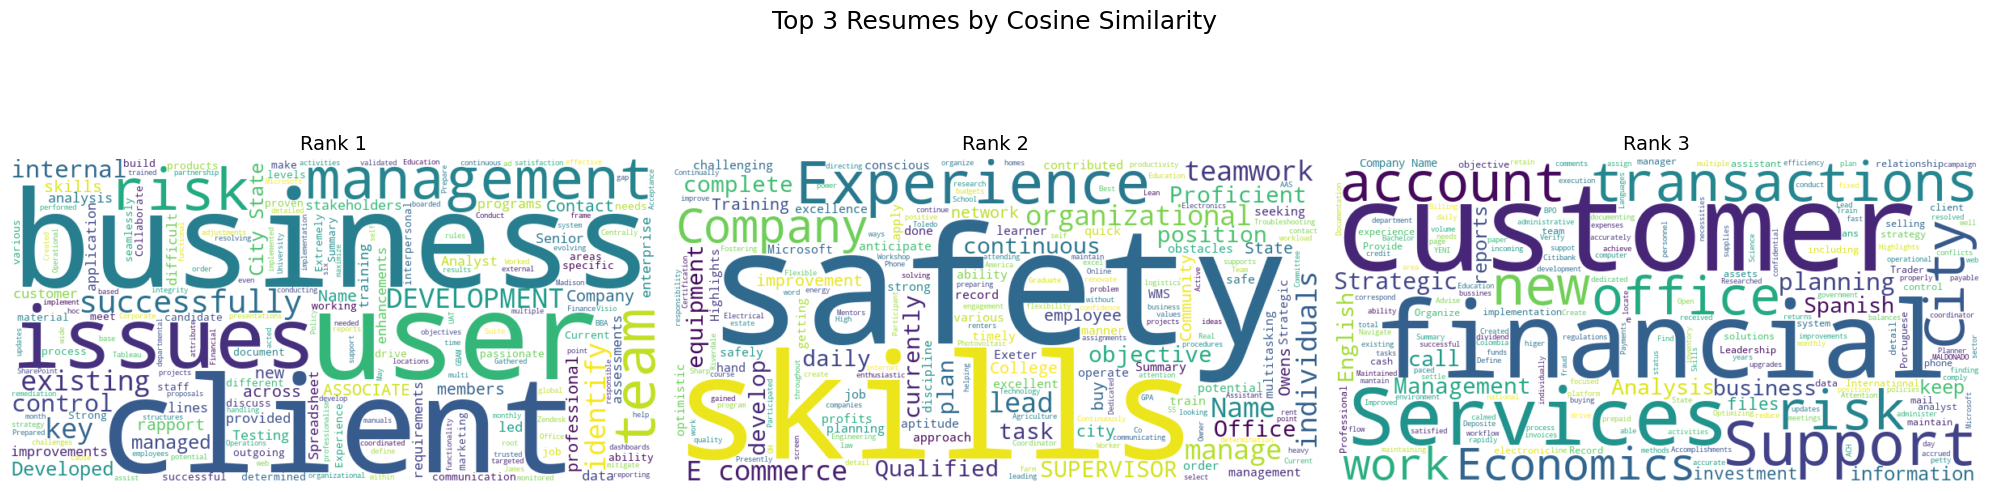


------------------------------------------------------------------------------------------------------------------------------------------------------



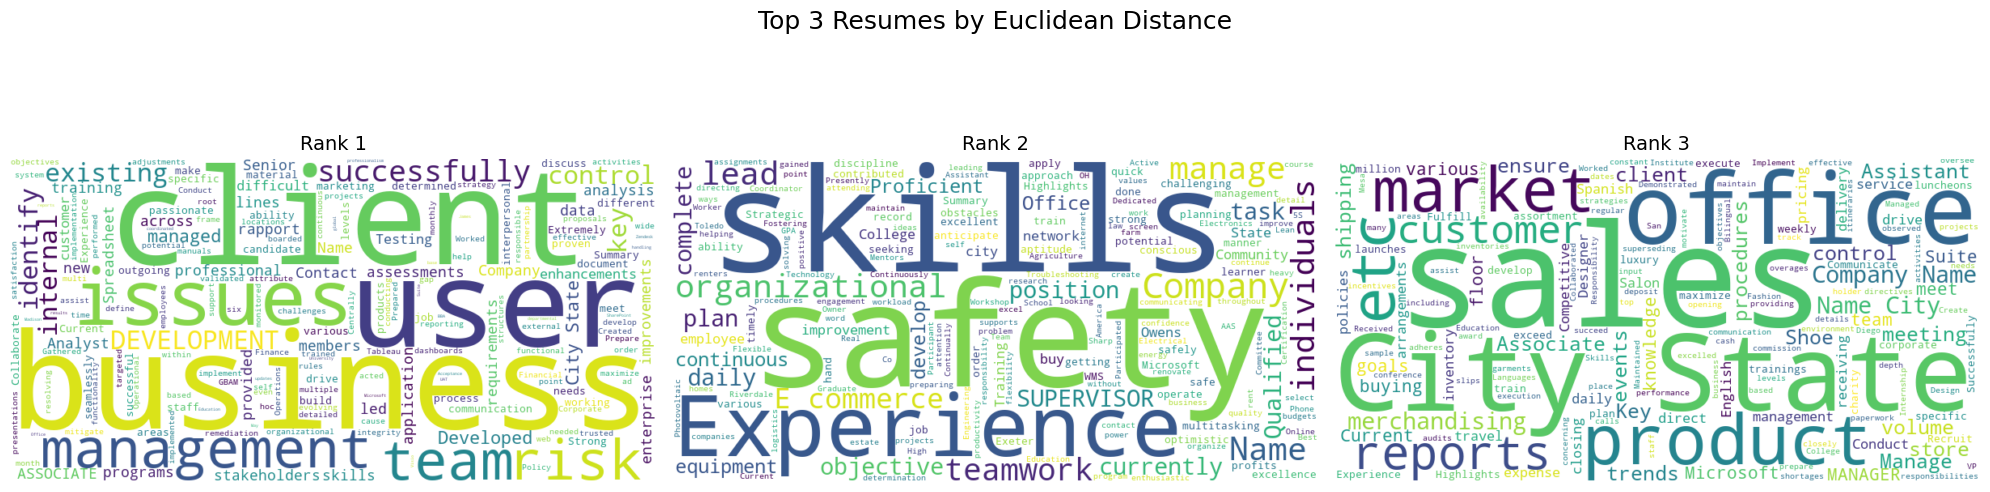


------------------------------------------------------------------------------------------------------------------------------------------------------



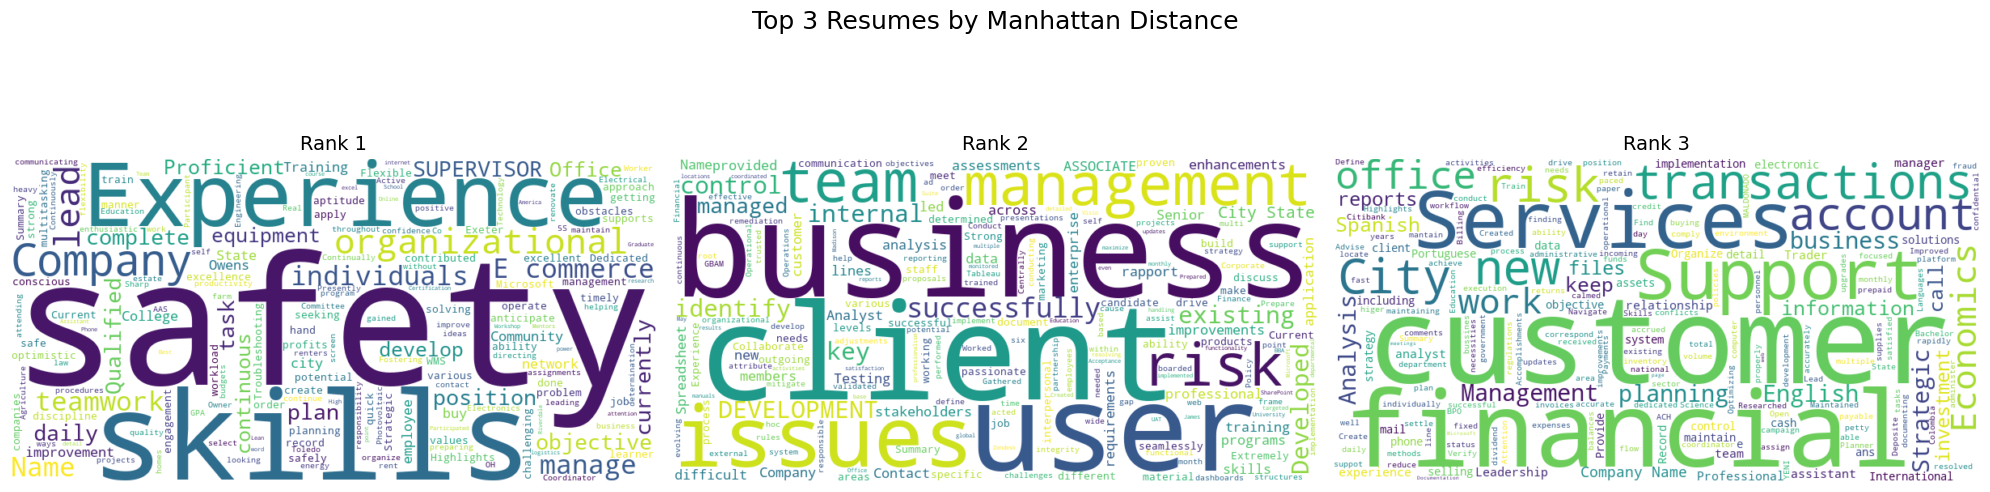


------------------------------------------------------------------------------------------------------------------------------------------------------



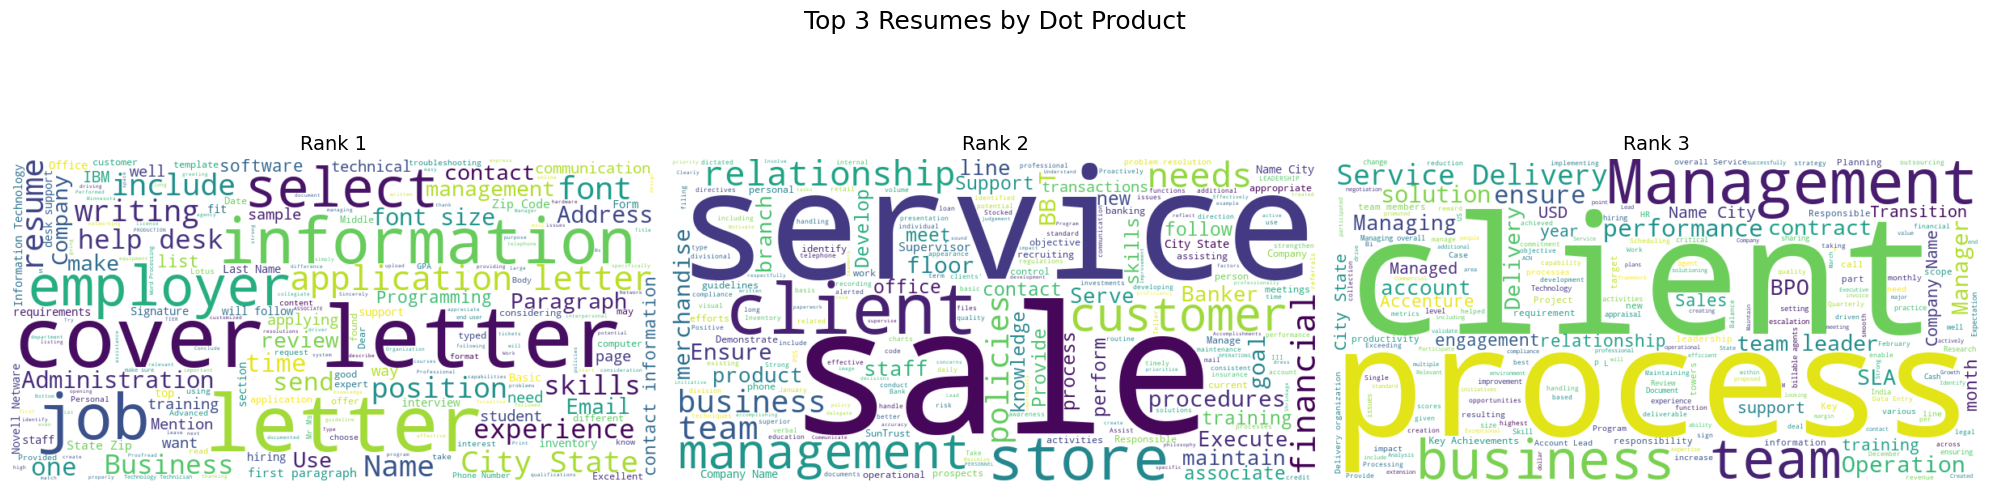

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud_for_resumes(metric_name, top_results_df, resumes_df):
    """
    Generates and displays word clouds for the top 3 resumes of a specific metric in a single row.
    """
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f"Top 3 Resumes by {metric_name}", fontsize=18)

    for i, (resume_id, row) in enumerate(top_results_df.iterrows()):
        if i >= 3:  # Limit to top 3 resumes
            break
        resume_text = resumes_df.loc[resume_id, 'Resume_str']
        
        # Create word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(resume_text)
        
        # Display in the subplot
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f"Rank {i+1}", fontsize=14)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.99])  # Leave space for the title
    plt.show()

# Example usage for each similarity metric
generate_wordcloud_for_resumes("Cosine Similarity", top_10_cosine, cleaned_resume_df)
print("\n" + "-" * 150 + "\n")
generate_wordcloud_for_resumes("Euclidean Distance", top_10_euclidean, cleaned_resume_df)
print("\n" + "-" * 150 + "\n")
generate_wordcloud_for_resumes("Manhattan Distance", top_10_manhattan, cleaned_resume_df)
print("\n" + "-" * 150 + "\n")
generate_wordcloud_for_resumes("Dot Product", top_10_dot, cleaned_resume_df)

## 